## O caixeiro com gasolina infinita (e sem conciência ambiental)



## Introdução



Neste experimento, tem-se uma problemática análoga a questão do caxeiro viajante no _experimento A.06_, em que, era necessário encontrar a ordem das cidades visitadas por ele, mas com a menor distância possível (o menor fitness possível: problema de minimização).

Neste caso, houveram mudanças no cenário, agora, o caixeiro tem combustível para DAR E VENDER! Ou seja, nosso objetivo é encontar o caminho mais longo, que passa pelo maior número de cidades, mas sem repetí-las(nosso limitador). Temos um problema de MAXIMIZAÇÃO!

Em ambos os casos, esse é um problema do tipo NP-Difícil, pois, não encontramos um algoritmo com 100% de eficácia em sua execução.

## Objetivo

Encontrar o caminho de maior distância no problema do caixeiro viajante com gasolina infinita.

Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. 
O critério de parada é a cidade inicial, de modo que ele sai, realiza a viagem mais longa e retorna a mesma cidade (a única que ele "passa" 2 vezes).

## Importações



In [9]:
import random
import matplotlib.pyplot as plt # gráfico

from itertools import permutations

from funcoes import cria_cidades

from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cv
from funcoes import funcao_objetivo_cv
from funcoes import selecao_torneio_max as funcao_selecao # esse já temos!
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

## Códigos e discussão



In [10]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido
NUMERO_DE_CIDADES = 10
CIDADES = cria_cidades(NUMERO_DE_CIDADES)

In [11]:
# Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

In [12]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = -float("inf")

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness) # problema de maximização
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness

In [13]:
# Busca testando todas as permutações

melhor_fitness_ever = -float("inf")

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

In [14]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 3', 'Cidade 8', 'Cidade 7', 'Cidade 5', 'Cidade 6', 'Cidade 4', 'Cidade 9', 'Cidade 2', 'Cidade 0', 'Cidade 1'] com distância: 5.5865989756389975

Melhor individuo obtido por busca exaustiva:
('Cidade 8', 'Cidade 9', 'Cidade 4', 'Cidade 6', 'Cidade 5', 'Cidade 7', 'Cidade 2', 'Cidade 0', 'Cidade 1', 'Cidade 3') com distância: 5.588027572364527


## Grafos

In [15]:
#para ilustrar a problemática

viagem = [] 

for i in melhor_resposta_ever:
    viagem.append(CIDADES[str(i)])
print(viagem)

[(0.05945320167443413, 0.7290095689854615), (0.9965035876830945, 0.6337321661120522), (0.30668507616105, 0.4245488071739787), (0.5401548042915153, 0.6555189561596272), (0.1535505783179748, 0.01818311390358296), (0.6660056026026098, 0.660984660910754), (0.09647426889227173, 0.6392010749695639), (0.560720536613784, 0.5635054188392113), (0.48547626870718597, 0.6751070813706488), (0.636143564958372, 0.49737396107616505)]


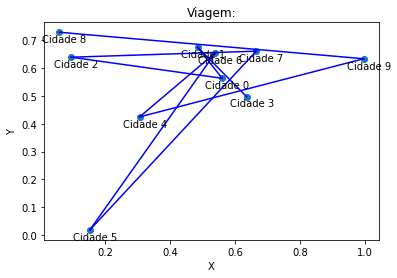

In [16]:
# cidades e seus respectivos nós

x = [ponto[0] for ponto in viagem]
y = [ponto[1] for ponto in viagem]

for n, nome in enumerate(melhor_resposta_ever):
    plt.annotate(nome, (x[n], y[n]), textcoords = "offset points", xytext=(5, -10), ha='center')
    
# nós
plt.scatter(x,y)

# retas
for e in range(len(viagem)-1):
    plt.plot([viagem[e][0], viagem[e+1][0]], [viagem[e][1], viagem[e+1][1]], 'b-')
    
# eixos
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Viagem:')

plt.show()

## Conclusão



Como já discutido, neste experimento tem-se um problema de maximização, em que, devemos encontrar o maior caminho a ser percorrido pelo caixeiro.
Durante a execução do código, optei pelo método de algoritmos genéticos, ou seja, um método probabilístico (em que, obtemos novos resultados a cada compilação). 
Para que isso acontecesse, a lógica do algoritmo foi alterada. Onde tinhamos variáveis buscando o menor fitness, trocamos para o maior. A função torneio mínimo também foi alterada para torneio máximo.

Ao final do experimento, temos um grafo representando a trajetória do caixeiro, cumprindo as diretrizes tratadas na introdução.


## Playground

